In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tabulate
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 59.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 77.8 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 46.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 33.4 MB/s eta 0:00:0000:0100:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=33b23468011c226a28fc8242fec68bc6589ac0ade44566ef13db6213981e0048
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 72.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.8/95

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz 
import zipfile
import seaborn as sns
import os
import gc
gc.collect()

0

In [3]:
 hpg_reserve = pd.read_csv('hpg_reserve.csv.zip',compression='zip')

In [4]:
def Assining_Variables():
    fle1 = "air_visit_data.csv"
    fle2 = "air_reserve.csv"
    fle3 = "air_store_info.csv"
    fle4 = "date_info.csv"
    fle5 = "store_id_relation.csv"
    fle6 = hpg_reserve
    fle7 = "hpg_store_info.csv"
    fnl_flle = "bk.csv"
    start_dt = date(2022, 4, 23)
    end_dt = date(2712,7, 22)
    llll= []
    return fle1,fle2,fle3,fle4,fle5,fle6,fle7,fnl_flle

In [5]:
def load_dataset(fle1,fle2,fle3,fle4,fle5,fle6,fle7):
    df_air_visit_data = pd.read_csv(fle1)
    df_air_reserve = pd.read_csv(fle2)
    df_air_store_info = pd.read_csv(fle3)
    df_date_info = pd.read_csv(fle4)
    df_store_id_relation = pd.read_csv(fle5)
    df_hpg_reserve = fle6
    df_hpg_store_info = pd.read_csv(fle7)   
    return df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info

In [6]:
 def Counting_NAN_Values(dfff):
        df_nan = pd.DataFrame(columns=['Nan count'])
        nan_col = list(dfff.columns.tolist())
        total_nan = 0
        for col in nan_col:
            nan_cnt = dfff[col].isnull().sum()
            df_nan.loc[col] = nan_cnt
            total_nan += nan_cnt
        print(tabulate(df_nan, headers = 'keys', tablefmt = 'psql'))
        return df_nan['Nan count']

In [7]:
def Dataset_Cleaning(dff):
        dfff = dff.isna().sum().sum()
        print("Total NAN values are : {0}".format(dfff))
        dff_nan = dff[pd.isnull(dff).any(axis=1)]
        print("Data with at least 1 NAN values: {0}".format(len(dff_nan.index)))
        df_nan_all = dff[pd.isnull(dff).all(1)]
        print("Rows filled NAN data: {0}".format(len(df_nan_all.index)))
        df_air_store = dff.air_store_id.isnull().sum()
        df_hpg_store = dff.hpg_store_id.isnull().sum()
        print("Count of NAN values on air_store_id are: {0}".format(df_air_store))
        print("Count of NAN values on hpg_store_id are: {0}".format(df_hpg_store))
        nan_ids_df = dff[dff.air_store_id.isnull() & dff.hpg_store_id.isnull()]
        len_invalid_id = len(nan_ids_df.index)
        print("Number of Invalid IDs (both air_store_id & hpg_store_id) are : {0}".format(len_invalid_id))
        df_nadn = Counting_NAN_Values(dff)
        
        """"dff['calendar_date'] = dff['calendar_date'].replace(np.nan, -1)
        dff['day_of_week'] = dff['day_of_week'].replace(np.nan, -1)
        dff['holiday_flg'] = dff['holiday_flg'].replace(np.nan, -1)
        dff['hpg_store_id'] = dff['hpg_store_id'].replace(np.nan, -1)
        #dff.drop(['calendar_date','day_of_week','holiday_flg','hpg_store_id'],axis=1,inplace=True)
        le = LabelEncoder()
        dff[['genre_name', 'area_name']] = dff[['genre_name', 'area_name']].apply(le.fit_transform)"""
        
        #Replacing NAN values of air_store_id,visit_datetime,reserve_datetime,visitors,reserve_visitors, with appropriate constant values
        """"dff[['visit_datetime','reserve_datetime']] = dff[['visit_datetime','reserve_datetime']].replace(np.nan,'9999 00:00:00.000')
        dff[['visitors','reserve_visitors']] = dff[['visitors','reserve_visitors']].replace(np.nan,0.0)
        dff['visit_date'] = dff['visit_date'].replace(np.nan,9999)
        dff[['visitors','reserve_visitors']] = dff[['visitors','reserve_visitors']].astype(int)
        dff[['air_store_id']] = dff[['air_store_id']].replace(np.nan,'air_ba937bf13d40fc25')
        #dff[['visit_datetime','reserve_datetime']] = pd.to_datetime(dff[['visit_datetime','reserve_datetime','visit_date']].astype(str),format='%Y-%m-%d')
        df_nadn = Counting_NAN_Values(dff)"""
        #dff.drop(['genre_name','area_name'],axis=1)
        #print(dff)
        return dfff,df_nadn

In [8]:
def Nan_Percent_Computation(dffff):
        nan_values_cnt,df_nafn = Dataset_Cleaning(dffff)
        total_values_cnt = dffff.shape[0]*dffff.shape[1]
        print("Total Values' Counts are : {0}".format(total_values_cnt))
        total_correct_values_cnt = (total_values_cnt - nan_values_cnt)
        print("Total Correct Values' Counts are : {0}".format(total_correct_values_cnt))
        return total_correct_values_cnt,nan_values_cnt,df_nafn

In [9]:
def Pie_Chart_NAN_Column_Plotting(dft_val1,dfg,total_crt_value_cnt,nan_value_cnt):
    dft = pd.DataFrame({'Data': ['Correct Values', 'NAN Values'],
                          'ValueCount': [total_crt_value_cnt,nan_value_cnt]})
        # Plotting the pie chart for above dataframe
    #dft.groupby(['Data']).sum().plot(kind='pie', y='Value Count', autopct='%1.0f%%')
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    #sizes = [215, 130,215, 130,215, 130]
    color = ['lightcoral', 'lightskyblue']
    explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    plt.pie(sdd, explode=explode1, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
   
    # Define the ratio of gap of each fragment in a tuple
    #explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05)
    # DataFrame of each student and the votes they get df_nan_disp['Data Name'],df_nan_disp['NAN Count for each Column']
    #dft = pd.DataFrame({'Data Name': dfg.columns,'NAN Count for each Column':dft_val1})
    # Plotting the pie chart for above dataframe
    # Data to plot
    #labels = dfg.columns.values
    #sddd = dft_val1.values
    #sizes = [215, 130,215, 130,215, 130,215, 130,215, 130,215, 130,215, 130]
    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    #explode = (0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0)  # explode 1st slice
    # Plot
    #plt.pie(sddd, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
    #plt.axis('equal')
    #plt.show()

In [10]:
def Final_Dataset():
        fle1,fle2,fle3,fle4,fle5,fle6,fle7,fnl_flle = Assining_Variables()
        df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = load_dataset(fle1,fle2,fle3,fle4,fle5,fle6,fle7)
        #df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = self.load_dataset()
        h1,t1 = os.path.split(fle1)
        h2,t2 = os.path.split(fle2)
        h3,t3 = os.path.split(fle3)
        h4,t4 = os.path.split(fle4)
        h5,t5 = os.path.split(fle5)
        #h6,t6 = os.path.split(fle6)
        h7,t7 = os.path.split(fle7)
        print("The shape of {0} is {1}".format(t1,df_air_visit_data.shape),end="\n")
        print("The shape of {0} is {1}".format(t2,df_air_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t3,df_air_store_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t4,df_date_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t5,df_store_id_relation.shape),end="\n")
        print("The shape of hpg_rserve file is {0}".format(df_hpg_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t7,df_hpg_store_info.shape),end="\n")
        
        df_n = pd.concat([df_air_visit_data[['air_store_id','visit_date','visitors']],df_air_reserve], axis=0, join="outer")
        df_nn = pd.merge(df_n,df_air_store_info,on='air_store_id',how="left")
        df_nn = df_nn.rename(columns = {'air_genre_name':'genre_name','air_area_name':'area_name'})
        hpg_n = pd.merge(df_hpg_store_info,df_hpg_reserve,on='hpg_store_id',how="left")
        #hpg_n = pd.concat([df_hpg_store_info,df_hpg_reserve,], axis=0, join="outer")
        hpg_n = hpg_n.rename(columns = {'hpg_genre_name':'genre_name','hpg_area_name':'area_name'})
        hpg_nn = pd.merge(hpg_n,df_store_id_relation,on='hpg_store_id',how="left")
        hpg_date = pd.concat([hpg_nn,df_date_info,], axis=0, join="outer")
        df = pd.concat([df_nn,hpg_date], axis=0, join="outer")
        #hpg_date = [hpg_nn,df_date_info]
        #df_date = pd.concat(hpg_date,axis=1)
        #df_nnnn = [df_nn,df_date]
        #df = pd.concat(df_nnnn,axis=0)
        print(df)
        
 
        #Merging
        """df_n = pd.merge(df_air_visit_data[['air_store_id','visit_date','visitors']],df_air_reserve,how="outer")      
        df_nn = pd.merge(df_n,df_air_store_info,on='air_store_id',how="left")
        df_nn = df_nn.rename(columns = {'air_genre_name':'genre_name','air_area_name':'area_name'})
        hpg_n = pd.merge(df_hpg_store_info,df_hpg_reserve,on='hpg_store_id',how="left")
        hpg_n = hpg_n.rename(columns = {'hpg_genre_name':'genre_name','hpg_area_name':'area_name'})
        hpg_nn = pd.merge(hpg_n,df_store_id_relation,on='hpg_store_id',how="left")
        hpg_date = [hpg_nn,df_date_info]
        df_date = pd.concat(hpg_date,axis=1)
        df_nnnn = [df_nn,df_date]
        df = pd.concat(df_nnnn,axis=0)
        print(df)"""
        
        total_crt_value_cnt,nan_value_cnt,df_najn = Nan_Percent_Computation(df)
        #Pie_Chart_Plotting(total_crt_value_cnt,nan_value_cnt)
        df_nan_disp = pd.DataFrame()
        Pie_Chart_NAN_Column_Plotting(df_najn,df,total_crt_value_cnt,nan_value_cnt)
        
        #Printing the number of NANs in each column
        n_rows = len(df)
        for i in range(0,len(df_najn)):
            nan_percent_in_each_col = ((df_najn/n_rows)*100)
            df_nan_disp = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col})
        print(tabulate(df_nan_disp, headers = 'keys', tablefmt = 'psql'))
            
        df.drop(['calendar_date','day_of_week','holiday_flg'],axis=1,inplace=True)
        df[['visit_date','visitors','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id']] = df[['visit_date','visitors','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id']].replace(np.nan,9999)
        #df[['latitude','longitude','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id','hpg_area_name','hpg_genre_name']] = df[['latitude','longitude','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id','hpg_area_name','hpg_genre_name']].replace(np.nan,9999)
        df[['area_name','latitude','longitude','genre_name']] = df[['area_name','latitude','longitude','genre_name']].replace(np.nan,9999)
        df.drop(df.index[df['latitude'] == 9999], inplace=True)
        df.drop(df.index[df['longitude'] == 9999], inplace=True)
        #df.drop(df.index[df['visit_datetime'] == 9999], inplace=True)
        #df.drop(df.index[df['reserve_datetime'] == 9999], inplace=True)
        #df.drop(df.index[df['reserve_visitors'] == 9999], inplace=True)
        #df.drop(df.index[df['hpg_store_id'] == 9999], inplace=True)
        df['air_store_id'] = df['air_store_id'].replace(np.nan,9999)
        df.drop(df.index[df['air_store_id'] == 9999], inplace=True)
        df.drop(df.index[df['area_name'] == 9999], inplace=True)
        df.drop(df.index[df['genre_name'] == 9999], inplace=True)
        #df[['visitors']] = df[['visitors']].astype(int)
        #df.reset_index()"""
        #print(df)
        df_nadjn = Counting_NAN_Values(df)
        print(df)
        #print(df[['air_store_id','visit_date','visitors']])
        return df,fnl_flle

        #df = df[df['air_store_id'] != 9999]
        #df.drop(['air_store_id'],axis=0,inplace=True)
        
        #dff = self.Merge_dataframe(dff)
        
        #print(len(dff[['air_store_id','visit_date','visitors']]))

In [11]:
def Merge_dataframe(df):    
    df = df.assign(air_store_id_train = df[['air_store_id','visit_date']].apply(lambda row: '_'.join([str(each) for each in row]),axis=1))
    xt = pd.factorize(df['air_store_id_train'])[0]
    X_train = pd.DataFrame(xt)
    #X_train = X_train.head(252108)
    y_train = df['visitors'].astype(int)
    #y_train = y_train.head(252108)
    for dt in daterange():
        lll.append(dt.strftime("%Y-%m-%d"))
    df['New_visit_date'] = pd.DataFrame({'New_visit_date':lll})
    #df['New_visit_date'] = lll
    df = df.assign(air_store_id_test = df[['air_store_id','New_visit_date']].apply(lambda row: '_'.join([str(each) for each in row]),axis=1))
    xtt= pd.factorize(df['air_store_id_test'])[0]
    X_test = pd.DataFrame(xtt)
    #le = LabelEncoder()
    #X_test = X_test.apply(le.fit_transform)
    #X_test = X_test.head(252108)
    return X_train,y_train,X_test

In [12]:
dt1 = date(2022, 4, 23)
dt2 = date(2712,7, 22)
lll = []
def daterange():
    for n in range(int ((dt2 - dt1).days)+1):
        yield dt1 + timedelta(n)

The shape of air_visit_data.csv is (252108, 3)
The shape of air_reserve.csv is (92378, 4)
The shape of air_store_info.csv is (829, 5)
The shape of date_info.csv is (517, 3)
The shape of store_id_relation.csv is (150, 2)
The shape of hpg_rserve file is (2000320, 4)
The shape of hpg_store_info.csv is (4690, 5)
             air_store_id  visit_date  visitors visit_datetime  \
0    air_ba937bf13d40fb24  13-01-2016      25.0            NaN   
1    air_ba937bf13d40fb24  14-01-2016      32.0            NaN   
2    air_ba937bf13d40fb24  15-01-2016      29.0            NaN   
3    air_ba937bf13d40fb24  16-01-2016      22.0            NaN   
4    air_ba937bf13d40fb24  18-01-2016       6.0            NaN   
..                    ...         ...       ...            ...   
512                   NaN         NaN       NaN            NaN   
513                   NaN         NaN       NaN            NaN   
514                   NaN         NaN       NaN            NaN   
515                   NaN     

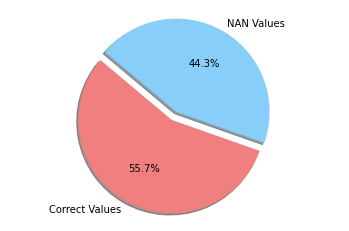

+------------------+------------------+
|                  |   % of NAN Count |
|------------------+------------------|
| air_store_id     |       70.5656    |
| visit_date       |       79.2727    |
| visitors         |       79.2727    |
| visit_datetime   |       20.7698    |
| reserve_datetime |       20.7698    |
| reserve_visitors |       20.7698    |
| genre_name       |        0.0425056 |
| area_name        |        0.0425056 |
| latitude         |        0.0425056 |
| longitude        |        0.0425056 |
| hpg_store_id     |       28.3647    |
| calendar_date    |       99.9575    |
| day_of_week      |       99.9575    |
| holiday_flg      |       99.9575    |
+------------------+------------------+
+------------------+-------------+
|                  |   Nan count |
|------------------+-------------|
| air_store_id     |           0 |
| visit_date       |           0 |
| visitors         |           0 |
| visit_datetime   |           0 |
| reserve_datetime |           0 |


In [13]:
df,fnl_flle = Final_Dataset()

In [15]:
X_train,y_train,X_test = Merge_dataframe(df)

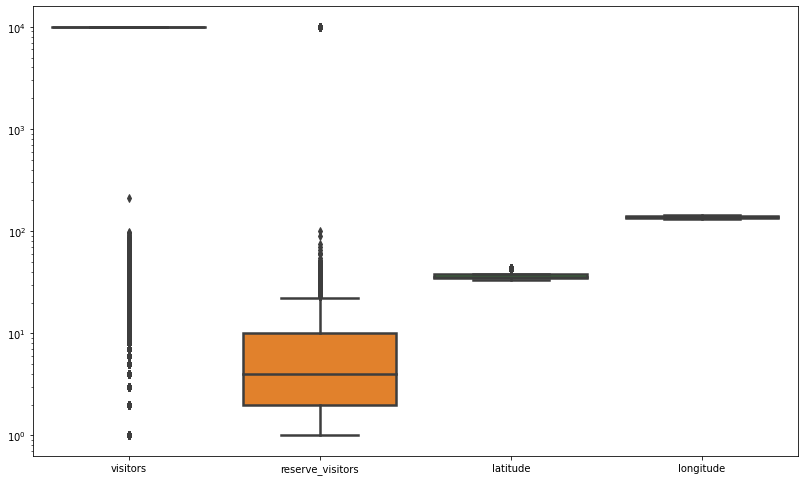

In [16]:
# To check outliers 
a4_dims = (13.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

In [17]:
def Classification_Model():
    clfg = DecisionTreeRegressor()
    clfg.fit(X_train,y_train)
    y_predeee = clfg.predict(X_test)
    print("Predicted values:")
    print(y_predeee)
    print ('Test Accuracy:',  clfg.score(X_test,y_predeee))
    print ('Training Accuracy:',  clfg.score(X_train,y_train))   
    #dd = df_train['visitors'].head(32019)
    #print ('MAE:', mean_absolute_error(y_train, y_pred))
    #print ('MSE:', mean_squared_error(y_train, y_pred))
    #print ('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))
    #print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_train, y_pred))))
    #print ('R2:', r2_score(y_train, y_pred))
    return y_predeee,clfg

In [18]:
y_predeeee,clfg = Classification_Model()

Predicted values:
[1.200e+01 8.000e+00 1.900e+01 ... 9.999e+03 9.999e+03 9.999e+03]
Test Accuracy: 1.0
Training Accuracy: 1.0


In [19]:
def Performance_Evaluation():
    clf = DecisionTreeRegressor(max_depth=3)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    print ('Test Accuracy:',  clf.score(X_test,y_pred)*100)
    print ('Training Accuracy:',  clf.score(X_train,y_train)*100) 
    ts_acc = clf.score(X_test,y_pred)*100
    tr_acc = clf.score(X_train,y_train)*100
    Mean_acc = (((ts_acc+tr_acc)/2))
    print ('Accuracy is: {0}'.format(Mean_acc)) 
    print ('MAE:', mean_absolute_error(y_train, y_pred))
    print ('MSE:', mean_squared_error(y_train, y_pred))
    print ('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))
    print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_train, y_pred))))
    print ('R2:', r2_score(y_train, y_pred))
    return y_pred,clf

In [20]:
y_pred,clf = Performance_Evaluation()

Predicted values:
[  11.49438202   11.49438202   11.49438202 ... 9999.         9999.
 9999.        ]
Test Accuracy: 100.0
Training Accuracy: 99.99970114513806
Accuracy is: 99.99985057256903
MAE: 2.018427180684753
MSE: 42.285140468038556
RMSE: 6.502702551096625
RMSLE: 1.872217867582036
R2: 0.9999970114513806


In [21]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

In [22]:
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

In [23]:
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [24]:
!pip install mlxtend
from mlxtend.evaluate import bias_variance_decomp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.6 MB/s eta 0:00:00 0:00:01


In [25]:
from sklearn import metrics
mse, bias, var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_pred, loss='mse', num_rounds=100)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(X_test,y_pred))

MSE from bias_variance lib [avg expected loss]: 790.089
Avg Bias: 104.300
Avg Variance: 685.789
Mean Square error by Sckit-learn lib: 11067418.659


In [26]:
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_pred, clf)
#variance
var = np.var(y_pred)
SSE = np.mean((np.mean(y_pred) - y_train)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.

Bias = SSE - var
print("Training Error:",train_error)
print("Test Error:",test_error)
print("Variance:",var)
print("Bias:",Bias)

Training Error: 42.285140468038556
Test Error: 0.0
Variance: 14149013.277629381
Bias: 42.28514047153294


[-0.11781441 -0.75364052  1.          1.          1.          1.
  1.          1.          1.          1.        ]
Accuracy 71.28545070236349


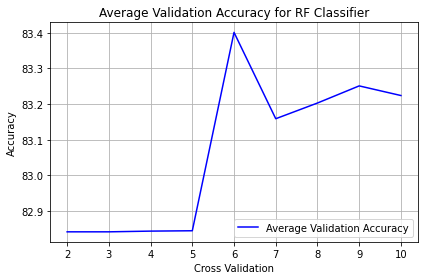

In [27]:
from sklearn.model_selection import RandomizedSearchCV,KFold,GridSearchCV
kfold = KFold(n_splits=10)
results = sklearn.model_selection.cross_val_score(clf,X_train,y_train,cv=kfold)
print(results)
print("Accuracy",results.mean()*100)
# Plot mean accuracy scores for training and testing scores
avg_acc = [82.842,82.842,82.844,82.845,83.401,83.159,83.203,83.251,83.224]
c_val = [2,3,4,5,6,7,8,9,10]
plt.plot(c_val, avg_acc,
     label = "Average Validation Accuracy", color = 'b')
#plt.plot(n_est, mean_test_score,
 #  label = "Cross Validation Score", color = 'g')
#Creating the plot
plt.title("Average Validation Accuracy for RF Classifier")
plt.xlabel("Cross Validation")
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [28]:
print(clf.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2',None]
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
min_weight_fraction_leaf = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_leaf_nodes = [None,10,20,30,40,50,60,70,80,90]
splitter = ["best","random"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'criterion':criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'min_weight_fraction_leaf':min_weight_fraction_leaf,
               'max_leaf_nodes':max_leaf_nodes,
               'splitter':splitter}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90], 'splitter': ['best', 'random']}


In [30]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END criterion=poisson, max_depth=100, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.5, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=100, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.5, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=100, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.5, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=100, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.5, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=100, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.5, splitter=best; total time=   0.0s
[CV] E

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
695 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
695 fits failed with the following error:
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_le

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=3),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
          

In [31]:
print(rf_random.best_params_)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 40, 'max_features': 'log2', 'max_depth': 70, 'criterion': 'absolute_error'}


In [32]:
def Classification_Model():
    clf_r = DecisionTreeRegressor(criterion='absolute_error',splitter='best',min_weight_fraction_leaf=0.1,min_samples_split=5,min_samples_leaf=1,max_leaf_nodes=40,max_features='log2',max_depth=70)
    clf_r.fit(X_train,y_train)
    y_pred_r = clf_r.predict(X_test)
    print("Predicted values:")
    print(y_pred_r)
    #dd = df_train['visitors'].head(32019)
    print ('Accuracy:', accuracy_score(y_train, y_pred_r)*100)
    print ('F1 score:', f1_score(y_train, y_pred_r, average="weighted"))
    print ('Recall:', recall_score(y_train, y_pred_r, average="weighted"))
    print ('Precision:', precision_score(y_train, y_pred_r, average="weighted"))
    return y_pred_r,clf_r

In [33]:
y_pred_r,clf_r = Classification_Model()

Predicted values:
[  18.   18.   18. ... 9999. 9999. 9999.]
Accuracy: 83.33861260690529
F1 score: 0.8287026021008983
Recall: 0.8333861260690529
Precision: 0.8285671401768963


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn import metrics
mse, bias, var = bias_variance_decomp(clf_r, X_train.values, y_train.values, X_test.values, y_pred_r, loss='mse', num_rounds=100)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(X_test,y_pred_r))

MSE from bias_variance lib [avg expected loss]: 683.746
Avg Bias: 76.239
Avg Variance: 607.507
Mean Square error by Sckit-learn lib: 11068926.726


In [35]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [36]:
base_model = DecisionTreeRegressor(max_depth = 3)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_pred)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


In [37]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_pred_r)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


In [38]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


In [39]:
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_pred_r, clf_r)
#variance
var = np.var(y_pred_r)
SSE = np.mean((np.mean(y_pred_r) - y_train)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.

Bias = SSE - var
print("Training Error:",train_error)
print("Test Error:",test_error)
print("Variance:",var)
print("Bias:",Bias)

Training Error: 49.39298912469644
Test Error: 0.0
Variance: 14159832.20817248
Bias: -10776.21686229296


In [42]:
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(clf, out_file ='tree.dot',feature_names =['Visitor']) 